Importing Dataset and Libraries

In [ ]:
! pip install -q kaggle
from google.colab import files
uploaded = files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
#upload the kaggle api to imort dataset from kaggle

Saving kaggle.json to kaggle.json
ref                                                               title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                             Spotify and Youtube                                 9MB  2023-03-20 15:43:25           7470        279  1.0              
ppb00x/country-gdp                                                Country_GDP                                         7KB  2023-04-07 06:47:36            854         32  1.0              
erdemtaha/cancer-data                                             Cancer Data                                        49KB  2023-03-22 07:57:00           3015         72  1.0              
omartorres25/honda-data   

In [ ]:
#! kaggle datasets download 'Leaf Disease Detection Dataset'
! kaggle datasets download -d dev523/leaf-disease-detection-dataset

! unzip leaf-disease-detection-dataset.zip


Streaming output truncated to the last 5000 lines.
  inflating: dataset/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/b58223cf-fca6-4032-84f1-7bdea7c9e844___UF.GRC_YLCV_Lab 03023.JPG  
  inflating: dataset/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/b5d66ba6-f0b2-466a-af7b-7782365316cc___UF.GRC_YLCV_Lab 03343.JPG  
  inflating: dataset/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/b5df724d-f326-4d82-b39d-bf35f5715333___UF.GRC_YLCV_Lab 02719.JPG  
  inflating: dataset/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/b5feffb4-8676-41fa-9b89-6496c97effc8___YLCV_GCREC 2352.JPG  
  inflating: dataset/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/b613012a-7de8-4891-9d9a-0f075e4fc9f1___YLCV_NREC 0094.JPG  
  inflating: dataset/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/b62b0c7e-942d-477b-9c11-321c6b0964e2___UF.GRC_YLCV_Lab 09491.JPG  
  inflating: dataset/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/b633d977-9372-4286-9a34-792b7fae45b8___YLCV_GCREC 2622.JPG  
  inflating: dataset/train/Tomato___T

In [ ]:
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img
# from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

In [ ]:
train_datagen = ImageDataGenerator(zoom_range = 0.5, shear_range = 0.3, horizontal_flip = True, preprocessing_function= preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function= preprocess_input)

In [ ]:
train = train_datagen.flow_from_directory(directory = "/content/dataset/train", target_size = (256,256), batch_size= 32)
val = val_datagen.flow_from_directory(directory = "/content/dataset/test", target_size = (256,256), batch_size= 32)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
t_img, label = train.next()

In [ ]:
def plotImage(img_arr , label):

  for im, l in zip(img_arr, label):
    plt.figure(figsize=(5,5))
    plt.imshow(im/180)
    #plt.imshow(out, vmin=0, vmax=255)
    # plt.imshow(im.astype('uint8'))
    #plt.imshow((im / 180).astype(np.uint8))
    plt.show

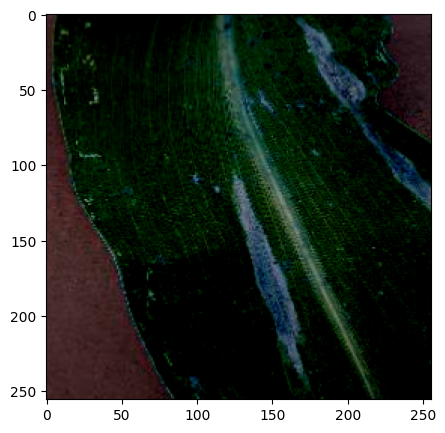

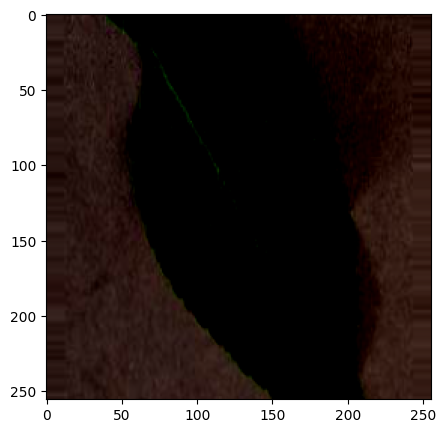

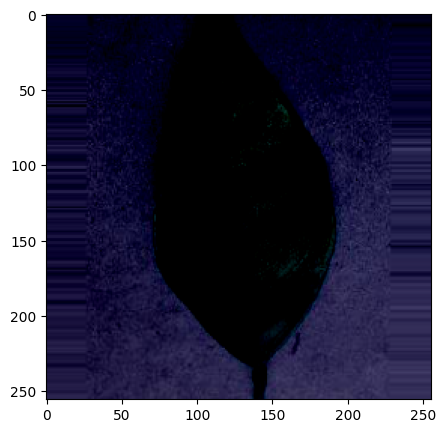

In [ ]:
plotImage(t_img[:3], label[:3])

# Building Our Model

In [ ]:
import keras
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19

In [ ]:
base_model = VGG19(input_shape=(256,256,3), include_top= False)

80134624/80134624 [==============================] - 3s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
X = Flatten()(base_model.output)

X = Dense(units = 38, activation = 'Softmax')(X)

# Creating our model
model = Model(base_model.input, X)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
#model.compile(optimizer= 'adam', loss = keras.__loader__.categorical_crossentropy, metrics = ['accuracy'])
# orignal one
model.compile(optimizer= 'adam', loss = keras.losses.categorical_crossentropy, metrics = ['accuracy'])

# Early Stopping and Model Check point

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Early Stopping
es = EarlyStopping(monitor='val_accuracy',min_delta = 0.01 , patience= 3, verbose=1)

# Model Check point
mc = ModelCheckpoint(filepath= "best_model.h5", monitor='val_accuracy',min_delta = 0.01 , patience= 3, verbose=1, save_best_only= True)

cb = [es,mc]

In [ ]:
# his = model.fit_generator(train, steps_per_epoch = 16, epochs = 50, verbose = 1, callbacks = cb, validation_data = val, validation_steps = 16)
his = model.fit_generator(train, steps_per_epoch = 18, epochs = 50, verbose = 1, callbacks = cb, validation_data = val, validation_steps = 16)

<ipython-input-17-2f670f8d00f9>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his = model.fit_generator(train, steps_per_epoch = 18, epochs = 50, verbose = 1, callbacks = cb, validation_data = val, validation_steps = 16)


Epoch 1/50
18/18 [==============================] - ETA: 0s - loss: 25.8473 - accuracy: 0.1944
Epoch 1: val_accuracy improved from -inf to 0.46680, saving model to best_model.h5
18/18 [==============================] - 34s 899ms/step - loss: 25.8473 - accuracy: 0.1944 - val_loss: 11.3282 - val_accuracy: 0.4668
Epoch 2/50
18/18 [==============================] - ETA: 0s - loss: 13.9793 - accuracy: 0.4340
Epoch 2: val_accuracy improved from 0.46680 to 0.61523, saving model to best_model.h5
18/18 [==============================] - 16s 900ms/step - loss: 13.9793 - accuracy: 0.4340 - val_loss: 8.9551 - val_accuracy: 0.6152
Epoch 3/50
18/18 [==============================] - ETA: 0s - loss: 11.8140 - accuracy: 0.5260
Epoch 3: val_accuracy improved from 0.61523 to 0.63672, saving model to best_model.h5
18/18 [==============================] - 15s 834ms/step - loss: 11.8140 - accuracy: 0.5260 - val_loss: 9.3377 - val_accuracy: 0.6367
Epoch 4/50
18/18 [==============================] - ETA: 0s 

In [ ]:
h = his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

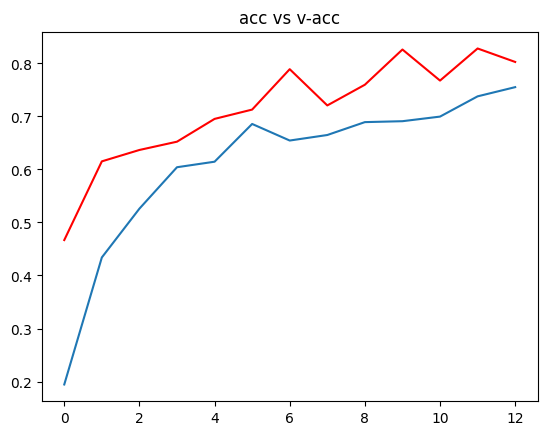

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = 'red')
plt.title("acc vs v-acc")
plt.show()

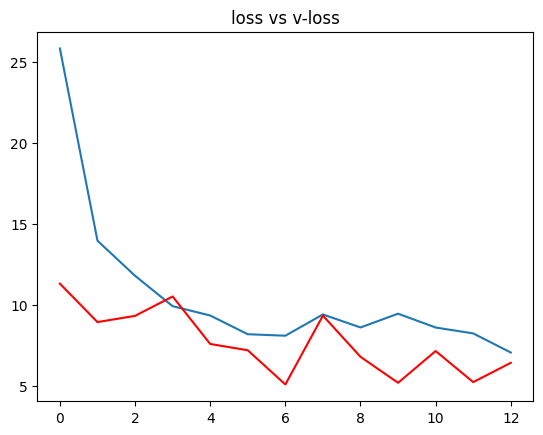

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = 'red')
plt.title("loss vs v-loss")
plt.show()

In [ ]:
# Load Best Model
from keras.models import load_model

model = load_model("/content/best_model.h5")

In [ ]:
acc = model.evaluate_generator(val)[1]

print(f"The Accuracy of the model is = {acc*100}%")

<ipython-input-22-f033ef281a99>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model.evaluate_generator(val)[1]


The Accuracy of the model is = 80.51445484161377%


In [ ]:
ref = dict(zip(list(train.class_indices.values()), list(train.class_indices.keys())))

In [ ]:
from typing import cast
def prediction(path):
  img = load_img(path, target_size =  (256,256))
  i = img_to_array(img)
  im = preprocess_input(i)
  img = np.expand_dims(im , axis = 0)
  pred = np.argmax(model.predict(img))
  print(f"The Image Belong to {ref[pred]}")

In [ ]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
path = "/content/photo.jpg"
prediction(path)

FileNotFoundError: ignored

In [ ]:
from IPython.display import Image
Image(path)

In [ ]:
train.class_indices

# Capture Photo

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))